# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [ ]:
# use these links to do so:


### Understanding the data

In [14]:
import numpy as np
import pandas as pd

In [15]:
churn=pd.read_csv('Churn.csv')

In [16]:
churn.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [17]:
churn.drop('customerID',inplace=True,axis=1)

In [19]:
# Categorical boolean mask
categorical_feature_mask = churn.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = churn.columns[categorical_feature_mask].tolist()

In [20]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [23]:
# apply le on categorical feature columns
churn[categorical_cols] = churn[categorical_cols].apply(lambda col: le.fit_transform(col))
churn[categorical_cols].head(10)

gender  Partner  Dependents  ...  PaymentMethod  TotalCharges  Churn
0       0        1           0  ...              2          2505      0
1       1        0           0  ...              3          1466      0
2       1        0           0  ...              3           157      1
3       1        0           0  ...              0          1400      0
4       0        0           0  ...              2           925      1
5       0        0           0  ...              2          6104      1
6       1        0           1  ...              1          1550      0
7       0        0           0  ...              3          2609      0
8       0        1           0  ...              2          2646      1
9       1        0           1  ...              0          3022      0

[10 rows x 17 columns]

In [24]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
X=churn.iloc[:,:19]

In [74]:
X.head()

gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  TotalCharges
0       0              0        1  ...              2           29.85          2505
1       1              0        0  ...              3           56.95          1466
2       1              0        0  ...              3           53.85           157
3       1              0        0  ...              0           42.30          1400
4       0              0        0  ...              2           70.70           925

[5 rows x 19 columns]

In [32]:
y=churn.iloc[:,19:]

In [33]:
y.head()

Churn
0      0
1      0
2      1
3      0
4      1

### Data Manipulation

In [42]:
import seaborn as sns
sns.boxplot(x=churn['MonthlyCharges'])

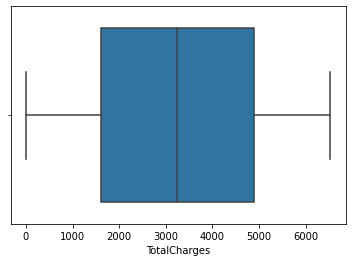

In [43]:
import seaborn as sns
sns.boxplot(x=churn['TotalCharges'])

In [44]:
import seaborn as sns
sns.boxplot(x=churn['tenure'])

In [46]:
import matplotlib.pyplot as plt


so based on my box plot there is not outliers present on the numerical value but again I will check through the scatter plot and z

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(churn['TotalCharges'], churn['tenure'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [50]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(churn['TotalCharges'], churn['MonthlyCharges'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

It seems like from the scatter plot all the variable are closely attached to each other so there is not outliers but let me decide by drawing through z value

### Data Visualization

In [51]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(churn))
print(z)

[[1.00955867 0.43991649 1.03453023 ... 1.16032292 0.39860759 0.60102348]
 [0.99053183 0.43991649 0.96662231 ... 0.25962894 0.94876238 0.60102348]
 [0.99053183 0.43991649 0.96662231 ... 0.36266036 1.64188328 1.66382851]
 ...
 [1.00955867 0.43991649 1.03453023 ... 1.1686319  0.13968008 0.60102348]
 [0.99053183 2.27315869 1.03453023 ... 0.32033821 0.31653445 1.66382851]
 [0.99053183 0.43991649 0.96662231 ... 1.35896134 1.13801338 0.60102348]]


In [52]:
threshold = 3
print(np.where(z > 3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [53]:
print(z[55][1])

2.273158691738958


lets try with interquartile range

In [54]:
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gender                 1.00
SeniorCitizen          0.00
Partner                1.00
Dependents             1.00
tenure                46.00
PhoneService           0.00
MultipleLines          2.00
InternetService        1.00
OnlineSecurity         2.00
OnlineBackup           2.00
DeviceProtection       2.00
TechSupport            2.00
StreamingTV            2.00
StreamingMovies        2.00
Contract               1.00
PaperlessBilling       1.00
PaymentMethod          1.00
MonthlyCharges        54.35
TotalCharges        3292.50
Churn                  1.00
dtype: float64


In [63]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(churn, 25), percentile(churn, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 10000


In [64]:
churn.corr()

gender  SeniorCitizen  ...  TotalCharges     Churn
gender            1.000000      -0.001874  ...     -0.005291 -0.008612
SeniorCitizen    -0.001874       1.000000  ...      0.037653  0.150889
Partner          -0.001808       0.016479  ...      0.059568 -0.150448
Dependents        0.010517      -0.211185  ...     -0.009572 -0.164221
tenure            0.005106       0.016567  ...      0.158523 -0.352229
PhoneService     -0.006488       0.008576  ...      0.083195  0.011942
MultipleLines    -0.006739       0.146185  ...      0.114955  0.038037
InternetService  -0.000863      -0.032310  ...     -0.055724 -0.047291
OnlineSecurity   -0.015017      -0.128221  ...      0.042357 -0.289309
OnlineBackup     -0.012057      -0.013632  ...      0.090756 -0.195525
DeviceProtection  0.000549      -0.021398  ...      0.105905 -0.178134
TechSupport      -0.006825      -0.151268  ...      0.057488 -0.282492
StreamingTV      -0.006421       0.030776  ...      0.138173 -0.036581
StreamingMovies  -0.008743       0.047266  ...      0.145366 -0.038492
Contract          0.000126      -0.142554  ...      0.106178 -0.396713
PaperlessBilling -0.011754       0.156530  ...      0.100957  0.191825
PaymentMethod     0.017352      -0.038551  ...     -0.067477  0.107062
MonthlyCharges   -0.014569       0.220173  ...      0.279875  0.193356
TotalCharges     -0.005291       0.037653  ...      1.000000  0.014479
Churn            -0.008612       0.150889  ...      0.014479  1.000000

[20 rows x 20 columns]

 VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF starts at 1 and has no upper limitVIF = 1,

no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

findings the correlation matrix of the variable

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(churn):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = churn.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(churn.values,i) for i in range(churn.shape[1])]
    return VIF_Scores
churn1 = churn.iloc[:,:-1]
vif_scores(churn1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Independent Features  VIF Scores
0                gender    1.930602
1         SeniorCitizen    1.366680
2               Partner    2.820768
3            Dependents    1.953659
4                tenure    7.476538
5          PhoneService   14.252701
6         MultipleLines    2.753961
7       InternetService    4.327149
8        OnlineSecurity    2.252831
9          OnlineBackup    2.436458
10     DeviceProtection    2.624311
11          TechSupport    2.383508
12          StreamingTV    3.231959
13      StreamingMovies    3.256444
14             Contract    4.171558
15     PaperlessBilling    2.831252
16        PaymentMethod    2.959580
17       MonthlyCharges   15.539771
18         TotalCharges    4.247034

In [70]:
churn = churn1.iloc[:,:-1]
vif_scores(churn)

Independent Features  VIF Scores
0                gender    1.927219
1         SeniorCitizen    1.366668
2               Partner    2.820681
3            Dependents    1.953419
4                tenure    7.472560
5          PhoneService   14.163616
6         MultipleLines    2.752970
7       InternetService    4.318899
8        OnlineSecurity    2.248957
9          OnlineBackup    2.434160
10     DeviceProtection    2.623127
11          TechSupport    2.381925
12          StreamingTV    3.231895
13      StreamingMovies    3.256005
14             Contract    4.144256
15     PaperlessBilling    2.817423
16        PaymentMethod    2.915944
17       MonthlyCharges   14.766965

In [71]:
churn = churn.drop(['PhoneService'],axis=1)
vif_scores(churn)

Independent Features  VIF Scores
0                gender    1.909757
1         SeniorCitizen    1.364286
2               Partner    2.819448
3            Dependents    1.944496
4                tenure    7.472480
5         MultipleLines    2.673918
6       InternetService    2.393608
7        OnlineSecurity    2.227753
8          OnlineBackup    2.433950
9      DeviceProtection    2.617240
10          TechSupport    2.367790
11          StreamingTV    3.148820
12      StreamingMovies    3.174964
13             Contract    4.107083
14     PaperlessBilling    2.815866
15        PaymentMethod    2.749142
16       MonthlyCharges    8.316629

here as per the rule we should evaluate the on the two column i.e "monthly charges and tenure"
 we can remove one of them as both are corelated to each other

VIF=\frac{1}{1-R^2}
Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.



In [72]:
churn = churn.drop(['tenure'],axis=1)
vif_scores(churn)

Independent Features  VIF Scores
0                gender    1.905785
1         SeniorCitizen    1.359754
2               Partner    2.704374
3            Dependents    1.940658
4         MultipleLines    2.557110
5       InternetService    2.393217
6        OnlineSecurity    2.187657
7          OnlineBackup    2.337800
8      DeviceProtection    2.591790
9           TechSupport    2.364359
10          StreamingTV    3.147181
11      StreamingMovies    3.171631
12             Contract    2.901507
13     PaperlessBilling    2.806590
14        PaymentMethod    2.634340
15       MonthlyCharges    7.949949

second way of detecting multicolinearity

In [75]:
import statsmodels.api as sm

In [76]:
X = sm.add_constant(X)

In [78]:
X.head()

const  gender  SeniorCitizen  ...  PaymentMethod  MonthlyCharges  TotalCharges
0    1.0       0              0  ...              2           29.85          2505
1    1.0       1              0  ...              3           56.95          1466
2    1.0       1              0  ...              3           53.85           157
3    1.0       1              0  ...              0           42.30          1400
4    1.0       0              0  ...              2           70.70           925

[5 rows x 20 columns]

In [79]:
## fit a OLS model with intercept on TV and Radio
model= sm.OLS(y, X).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     136.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:49:14   Log-Likelihood:                -3132.5
No. Observations:                7043   AIC:                             6305.
Df Residuals:                    7023   BIC:                             6442.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3363      0.022     15.430      0.000       0.294       0.379
gender              -0.0050      0.009     -0.550      0.582      -0.023       0.013
SeniorCitizen        0.0512      0.013      3.907      0.000       0.026       0.077
Partner              0.0005      0.011      0.043      0.965      -0.021       0.022
Dependents          -0.0227      0.012     -1.961      0.050      -0.045   -8.14e-06
tenure              -0.0048      0.000    -15.707      0.000      -0.005      -0.004
PhoneService        -0.1340      0.019     -6.906      0.000      -0.172      -0.096
MultipleLines        0.0134      0.006      2.394      0.017       0.002       0.024
InternetService      0.0528      0.008      6.397      0.000       0.037       0.069
OnlineSecurity      -0.0480      0.006     -8.205      0.000      -0.059      -0.037
OnlineBackup        -0.0317      0.006     -5.678      0.000      -0.043      -0.021
DeviceProtection    -0.0227      0.006     -3.921      0.000      -0.034      -0.011
TechSupport         -0.0480      0.006     -8.036      0.000      -0.060      -0.036
StreamingTV         -0.0032      0.006     -0.520      0.603      -0.015       0.009
StreamingMovies     -0.0026      0.006     -0.421      0.674      -0.015       0.009
Contract            -0.0400      0.008     -4.708      0.000      -0.057      -0.023
PaperlessBilling     0.0509      0.010      5.061      0.000       0.031       0.071
PaymentMethod        0.0050      0.005      1.098      0.272      -0.004       0.014
MonthlyCharges       0.0040      0.000     15.823      0.000       0.003       0.004
TotalCharges      2.902e-06   2.51e-06      1.156      0.248   -2.02e-06    7.83e-06
==============================================================================
Omnibus:                      538.092   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.830
Skew:                           0.538   Prob(JB):                     3.45e-98
Kurtosis:                       2.391   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()


gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges
gender            1.000000      -0.001874  ...       -0.014569     -0.005291
SeniorCitizen    -0.001874       1.000000  ...        0.220173      0.037653
Partner          -0.001808       0.016479  ...        0.096848      0.059568
Dependents        0.010517      -0.211185  ...       -0.113890     -0.009572
tenure            0.005106       0.016567  ...        0.247900      0.158523
PhoneService     -0.006488       0.008576  ...        0.247398      0.083195
MultipleLines    -0.006739       0.146185  ...        0.433576      0.114955
InternetService  -0.000863      -0.032310  ...       -0.323260     -0.055724
OnlineSecurity   -0.015017      -0.128221  ...       -0.053878      0.042357
OnlineBackup     -0.012057      -0.013632  ...        0.119777      0.090756
DeviceProtection  0.000549      -0.021398  ...        0.163652      0.105905
TechSupport      -0.006825      -0.151268  ...       -0.008682      0.057488
StreamingTV      -0.006421       0.030776  ...        0.336706      0.138173
StreamingMovies  -0.008743       0.047266  ...        0.335459      0.145366
Contract          0.000126      -0.142554  ...       -0.074195      0.106178
PaperlessBilling -0.011754       0.156530  ...        0.352150      0.100957
PaymentMethod     0.017352      -0.038551  ...       -0.193407     -0.067477
MonthlyCharges   -0.014569       0.220173  ...        1.000000      0.279875
TotalCharges     -0.005291       0.037653  ...        0.279875      1.000000

[19 rows x 19 columns]

Seaborn Correlation Heatmap

Text(0.5, 1.0, 'Seaborn')

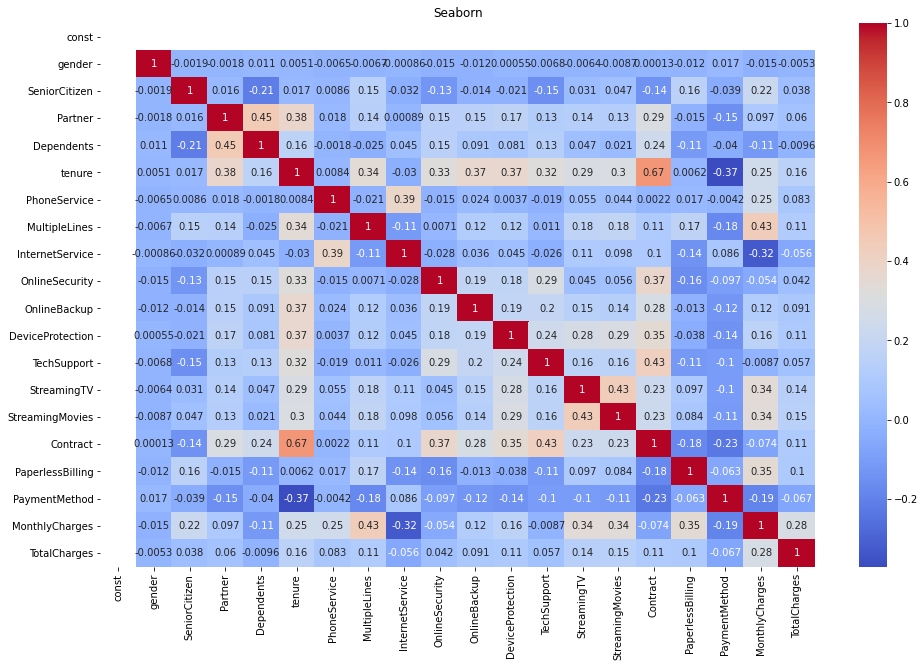

In [87]:
import seaborn
plt.figure(figsize=(16,10))
seaborn.heatmap(X.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')


Seaborn Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


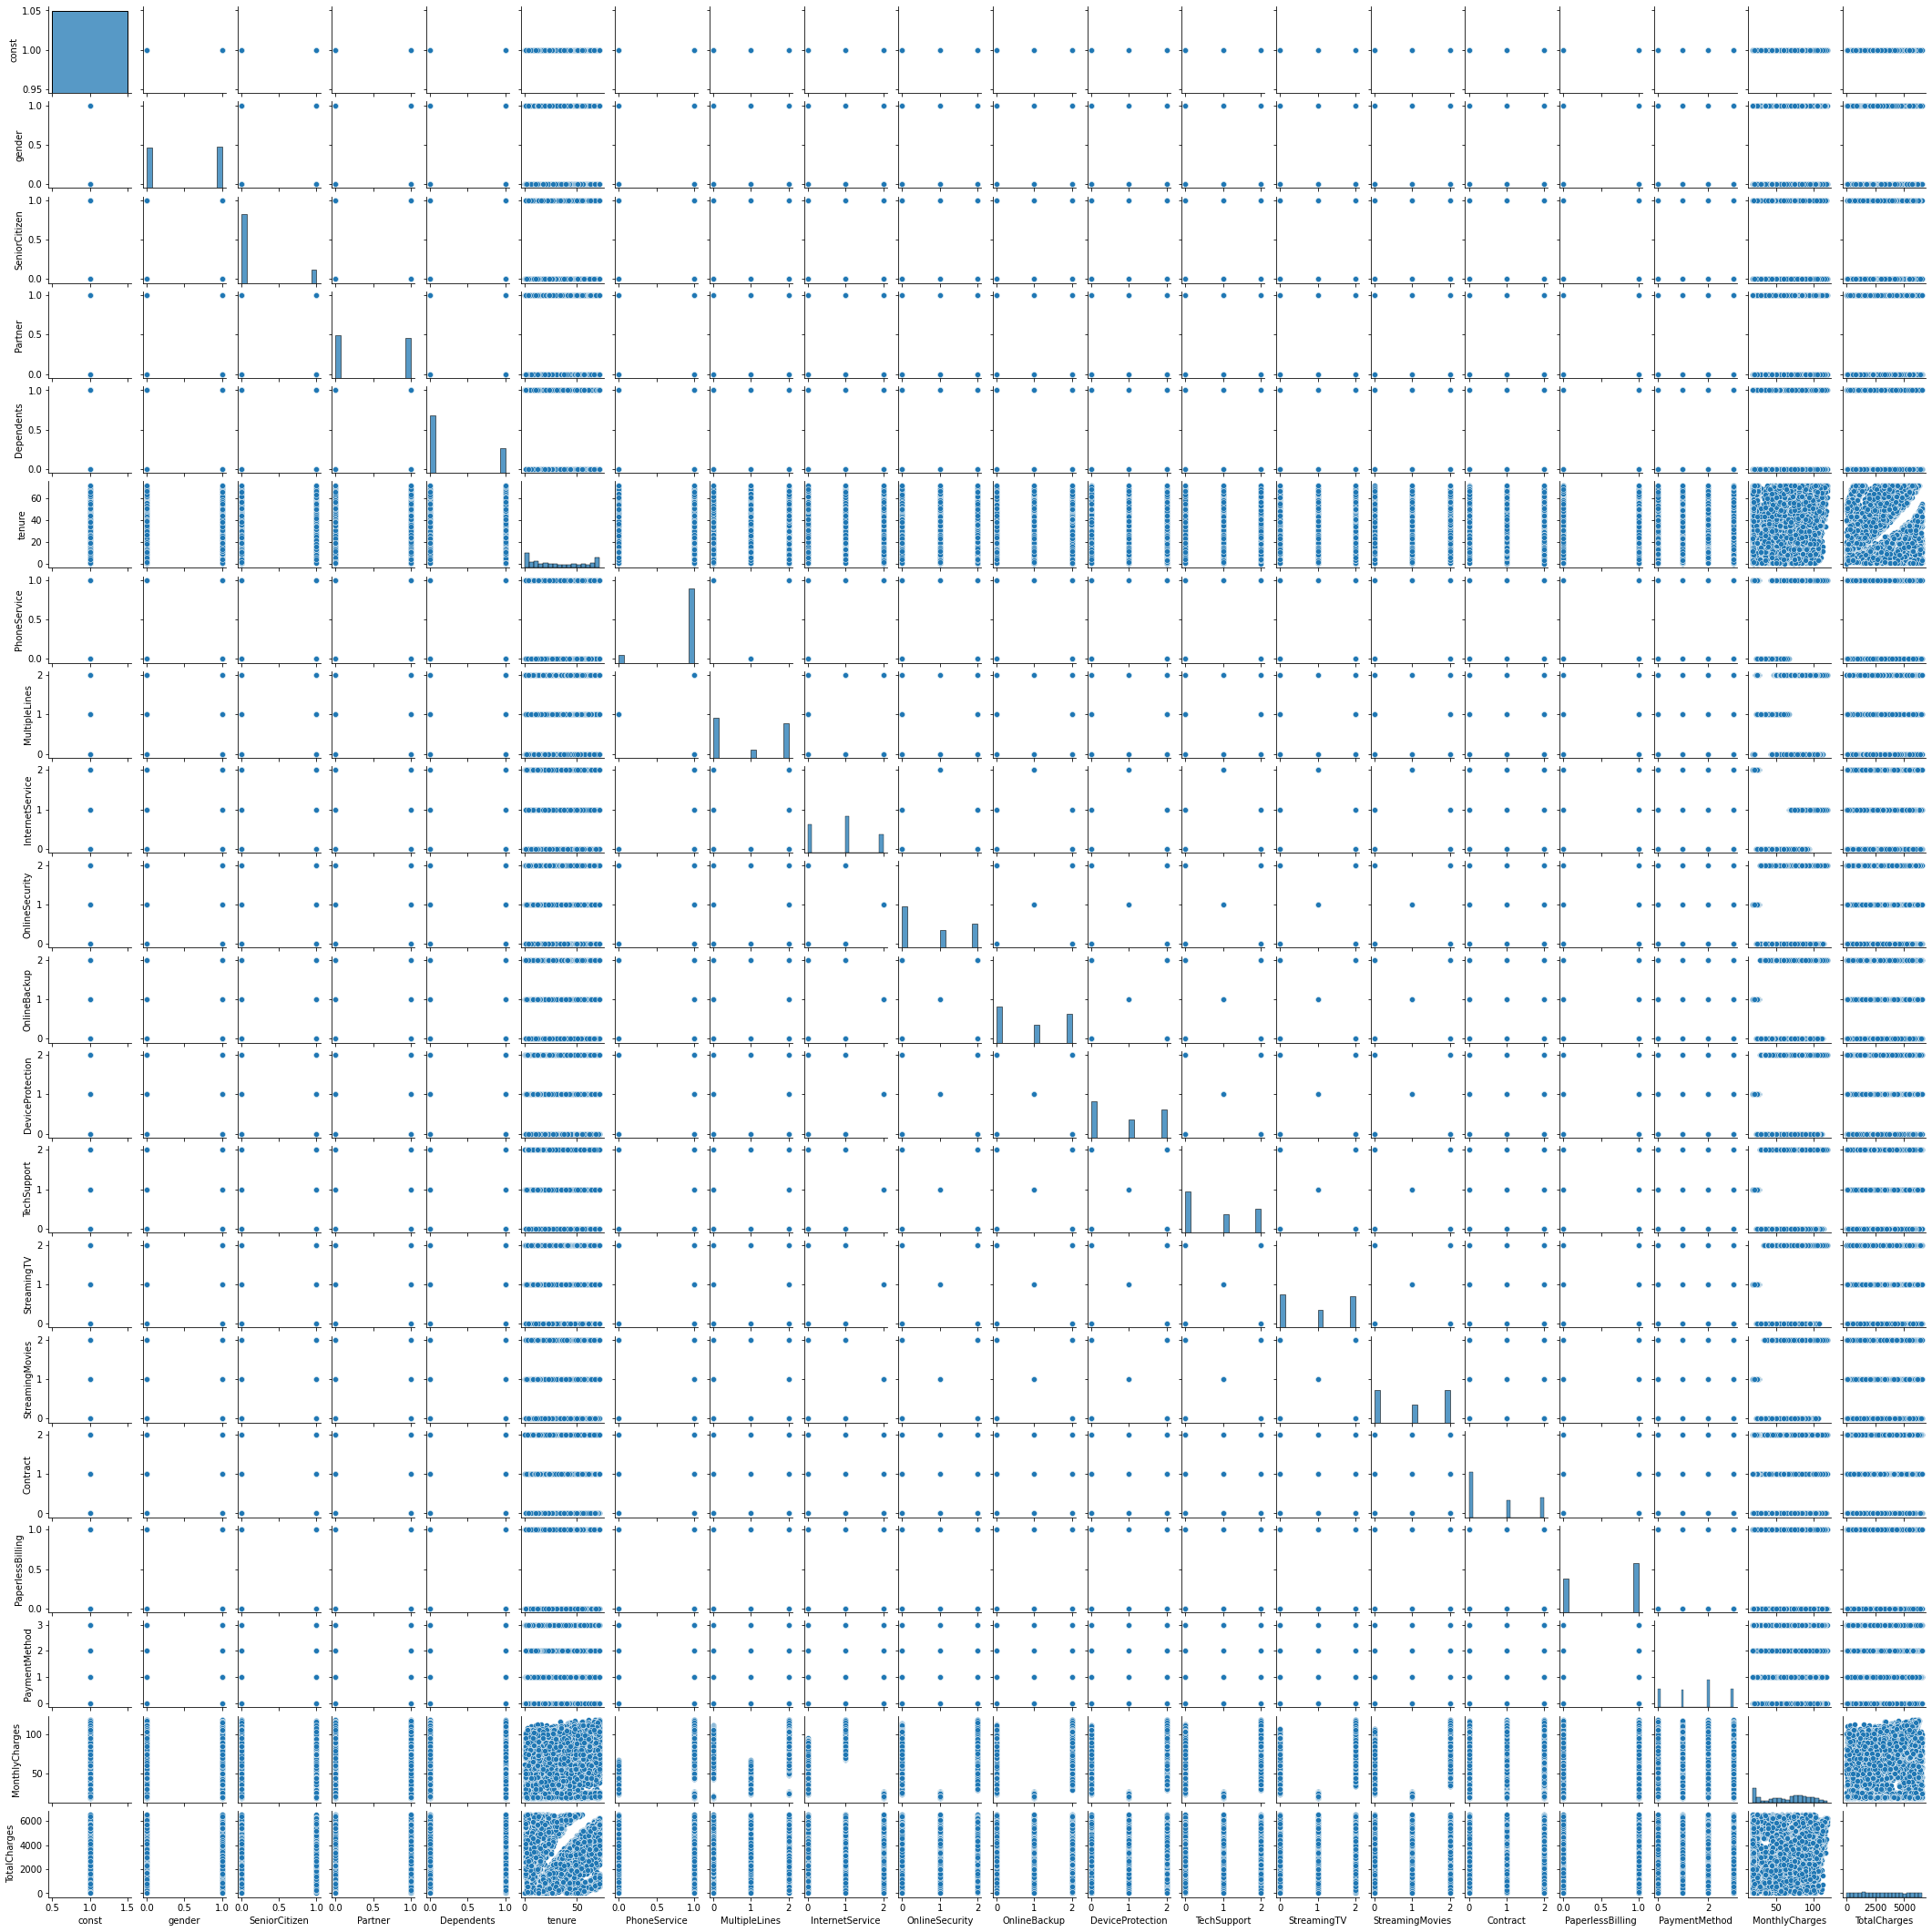

In [90]:

# compare pairplot and heatmap positive and negative correlations
cars_pairplot = X.dropna()
# cars_pairplot.to_excel('path/cars.xlsx')

# seaborn.pairplot(cars_pairplot, height=1.5)
# ; gets rid of extra text that accompanies plot
seaborn.pairplot(cars_pairplot, size=1.5);

In [ ]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [91]:
from sklearn.model_selection import  train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [96]:
X_train.shape

(4930, 20)

In [97]:
y_train.shape

(4930, 1)

In [98]:
X_test.shape

(2113, 20)

In [100]:
y_test.shape

(2113, 1)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr=LogisticRegression()

In [103]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred=lr.predict(X_test)

In [113]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [114]:
#Check the Quality of the model
# 1. Check for Generalization
# 2. Check for Score and identify whether the same is satisfactory or not

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8022312373225152
0.7983909133932797


In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, lr.predict(X))
cm

array([[4652,  522],
       [ 879,  990]])

In [116]:
from sklearn.metrics import  classification_report
report=classification_report

In [119]:
print(classification_report(y,lr.predict(X)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5174
           1       0.65      0.53      0.59      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.71      0.73      7043
weighted avg       0.79      0.80      0.79      7043



In [120]:
lr.predict(X)

array([0, 0, 0, ..., 0, 1, 0])

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(1,200):


  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
  
  model=LogisticRegression()
  model.fit(X_train,y_train)

  train_score=model.score(X_train,y_train)
  test_score=model.score(X_test,y_test)

  if test_score>train_score:
    print('Test {} Train{} Seed{}'.format(test_score,train_score,i))

Test 0.807382867960246 Train0.7973630831643002 Seed1
Test 0.8140085186938003 Train0.7989858012170385 Seed3
Test 0.7998106956933271 Train0.7943204868154158 Seed12
Test 0.8026502602934217 Train0.8008113590263691 Seed13
Test 0.8102224325603408 Train0.7973630831643002 Seed18
Test 0.8088026502602934 Train0.793711967545639 Seed19
Test 0.807382867960246 Train0.7971602434077079 Seed20
Test 0.8130619971604354 Train0.786815415821501 Seed24
Test 0.8035967818267865 Train0.8026369168356998 Seed26
Test 0.8045433033601515 Train0.7977687626774848 Seed31
Test 0.8102224325603408 Train0.7963488843813388 Seed35
Test 0.8017037387600567 Train0.8010141987829614 Seed36
Test 0.8002839564600095 Train0.7975659229208925 Seed38
Test 0.8097491717936584 Train0.7991886409736308 Seed42
Test 0.808329389493611 Train0.7973630831643002 Seed45
Test 0.808329389493611 Train0.8026369168356998 Seed46
Test 0.8154283009938476 Train0.7963488843813388 Seed49
Test 0.7974443918599148 Train0.7967545638945234 Seed51
Test 0.81116895409

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=4)
    
model = LogisticRegression()
model.fit(X_train,y_train)
    
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

print(train_score)
print(test_score)



0.8083067092651757
0.7792760823278921


In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=129)
    
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)
    
train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)

print(train_score)
print(test_score)


0.8205537806176784
0.765791341376863


In [135]:
confusion_matrix(y, model1.predict(X))

array([[4709,  465],
       [ 876,  993]])

In [136]:
print(classification_report(y,model1.predict(X)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5174
           1       0.68      0.53      0.60      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.72      0.74      7043
weighted avg       0.80      0.81      0.80      7043



In [137]:
model.predict(X_test) #Output of predict is the label value

array([0, 0, 0, ..., 0, 1, 0])

In [138]:
model.predict_proba(X_test)[:,1]

array([0.02789756, 0.10175599, 0.18177294, ..., 0.00462592, 0.72769599,
       0.01198347])

In [140]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model.predict_proba(X)[:,1]

#Calc AUC
auc = roc_auc_score(y,probabilityValues)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

0.8437520358925136


PR Curve for the best LogisticRegression Model

0.6551090459165875


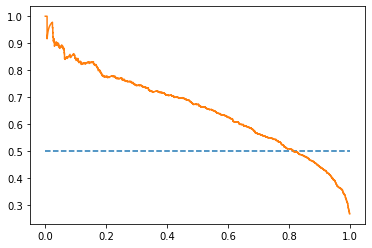

In [141]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model.predict_proba(X)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(y,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)



PR Curve for the best KNN Model

0.695461799243879


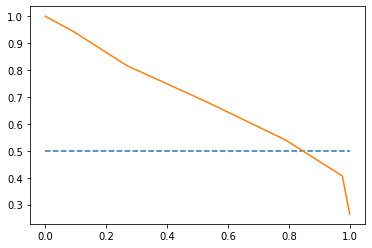

In [142]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model1.predict_proba(X)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(y,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)



In [144]:
confusion_matrix(y, model1.predict(X))

array([[4709,  465],
       [ 876,  993]])

In [145]:
confusion_matrix(y,model.predict(X))

array([[4620,  554],
       [ 837, 1032]])

In [146]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=4)

In [147]:
#Model For Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
modelDT.score(X_train,y_train)

0.9976925807596734

In [149]:
modelDT.score(X_test,y_test)

0.7061745919091554

In [150]:
for i in range (1,201):
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=i)
    modelDT = DecisionTreeClassifier()
    modelDT.fit(X_train,y_train)
    
    train=model.score(X_train,y_train)
    test=model.score(X_test,y_test)
    
    if test > train:
        print("{} {} {}".format(test,train,i))

0.8062455642299503 0.8015619453319134 2
0.8147622427253371 0.7994320198793042 3
0.8055358410220014 0.8017394391196309 6
0.8112136266855926 0.8003194888178914 7
0.8026969481902059 0.8024494142705005 9
0.8055358410220014 0.8017394391196309 10
0.8105039034776437 0.8004969826056088 13
0.8218594748048261 0.7976570820021299 14
0.8041163946061036 0.8020944266950657 15
0.8112136266855926 0.8003194888178914 16
0.8239886444286728 0.7971246006389776 18
0.8055358410220014 0.8017394391196309 19
0.8147622427253371 0.7994320198793042 20
0.8026969481902059 0.8024494142705005 23
0.8204400283889283 0.7980120695775648 24
0.808374733853797 0.8010294639687611 25
0.8034066713981547 0.8022719204827831 27
0.8119233498935415 0.8001419950301739 28
0.8140525195173882 0.7996095136670217 31
0.8041163946061036 0.8020944266950657 33
0.8232789212207239 0.7973020944266951 35
0.8097941802696949 0.8006744763933262 39
0.8176011355571328 0.7987220447284346 42
0.8140525195173882 0.7996095136670217 43
0.8176011355571328 0.7

### Model Evaluation

### Final Conclusions